In [119]:
#importing librairies
import graphviz 
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pltp 
import string
import io
import sklearn as sk #import tree 
from sklearn.model_selection import train_test_split
import sklearn.tree as skt#import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [120]:
#importing the csv file and cleaning up our data
data = pd.read_csv('./tpt.csv')
df2 = data.dropna(axis=0,inplace=False,how='any')
df2.to_csv('tpt1.csv')
data = df2
data


,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,76,No,3,Moen Mr. Sigurd Hansen,1,25.0,0,0,348123,7.6500,F G73,S
4,4,672,No,1,Davidson Mr. Thornton,1,31.0,1,0,F.C. 12750,52.0000,B71,S
16,16,378,No,1,Widener Mr. Harry Elkins,1,27.0,0,2,113503,211.5000,C82,C
19,19,225,Yes,1,Hoyt Mr. Frederick Maxfield,1,38.0,1,0,19943,90.0000,C93,S
26,26,588,Yes,1,Frolicher-Stehli Mr. Maxmillian,1,60.0,1,1,13567,79.2000,B41,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,862,619,Yes,2,Becker Miss. Marion Louise,0,4.0,2,1,230136,39.0000,F4,S
863,863,858,Yes,1,Daly Mr. Peter Denis,1,51.0,0,0,113055,26.5500,E17,S
865,865,196,Yes,1,Lurette Miss. Elise,0,58.0,0,0,PC 17569,146.5208,B80,C
875,875,463,No,1,Gee Mr. Arthur H,1,47.0,0,0,111320,38.5000,E63,S


In [121]:
#features extraction
x=data[["Sex", "Age"]]
y= data["Survived"]

#splitting data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

#applying tree algorithm
tree = sk.tree.DecisionTreeClassifier()  
tree.fit(x_train, y_train)   #fitting our model
y_pred=tree.predict(x_test)   # evaluating our model
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.6727272727272727


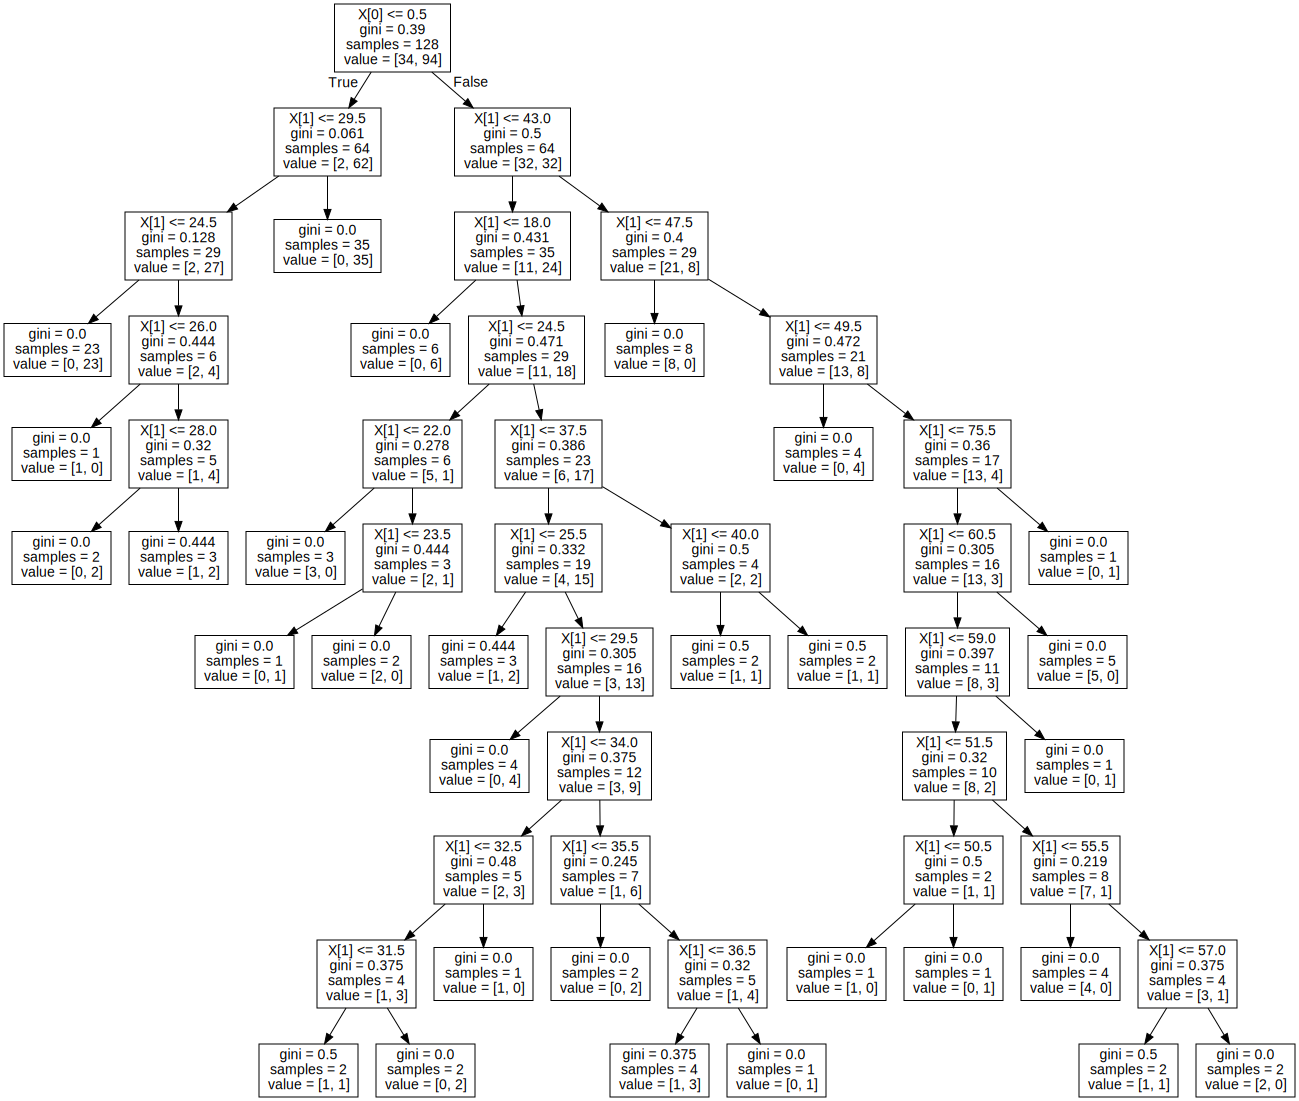

In [122]:
dot_data = sk.tree.export_graphviz(tree, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("data")
graph

In [123]:
#features extraction
x=data[["SibSp", "Fare"]]
y= data["Survived"]

#splitting data
x_train2, x_test2, y_train2, y_test2 = train_test_split(x,y, test_size=0.3)

#applying tree algorithm
tree = sk.tree.DecisionTreeClassifier()  
tree.fit(x_train2, y_train2)   #fitting our model
y_pred2=tree.predict(x_test2)   # evaluating our model
print("score:{}".format(accuracy_score(y_test2, y_pred2)))
print("we see that using the sex and age parameters makes our model more accurate than SibSp and Fare")



score:0.6
we see that using the sex and age parameters makes our model more accurate than SibSp and Fare


In [136]:


X=data[['Sex', 'Age']] #features
y= data["Survived"]  #target
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3) #splitting data with test size of 30%
clf=RandomForestClassifier(n_estimators=100)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))  #Measuring the accuracy of our model
print("when using a random forest approch aside from avoiding the problem of overfitting we notice that we get a higher accuacy than using a decision tree")

Accuracy: 0.6727272727272727
when using a random forest approch aside from avoiding the problem of overfitting we notice that we get a higher accuacy than using a decision tree
